In [19]:
import os

for dir_path,dir_names,file_names in os.walk("new_data"):
  print(f"There are {len(dir_names)} directories in {len(file_names)} images in {dir_path}")

There are 2 directories in 0 images in new_data
There are 3 directories in 0 images in new_data\test
There are 0 directories in 40 images in new_data\test\jeeswan
There are 0 directories in 40 images in new_data\test\krisha
There are 0 directories in 40 images in new_data\test\suyesh
There are 3 directories in 0 images in new_data\train
There are 0 directories in 160 images in new_data\train\jeeswan
There are 0 directories in 160 images in new_data\train\krisha
There are 0 directories in 160 images in new_data\train\suyesh


In [20]:
# Setup the train and test_directories
train_dir ="new_data/train/"
test_dir ="new_data/test/"


In [21]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name.strip() for item in data_dir.glob('*')]))
print(class_names)

['jeeswan' 'krisha' 'suyesh']


In [22]:
# Creating a function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['suyesh_27.jpg']
Image shape: (480, 640, 3)


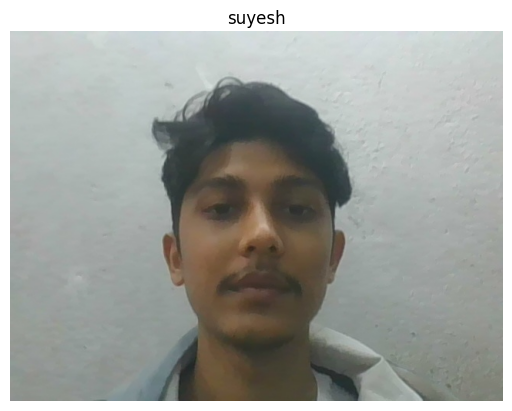

In [23]:
# visualize
import os
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [24]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,
#     shear_range=0.3,
#     zoom_range=0.3,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     brightness_range=[0.7, 1.3],
#     horizontal_flip=True,
#     fill_mode='nearest',
#     validation_split=0.2  # Auto split from training folder
# )

# train_data = train_datagen.flow_from_directory(
#     directory=train_dir,
#     target_size=(224, 224),
#     class_mode="categorical",
#     batch_size=8,
#     subset='training',
#     seed=42
# )

# val_datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2
# )

# val_data = val_datagen.flow_from_directory(
#     directory=train_dir,
#     target_size=(224, 224),
#     class_mode="categorical",
#     batch_size=8,
#     subset='validation',
#     seed=42
# )


In [25]:
import pandas as pd
def plot_loss_curves(history):
  loss=history.history["loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  val_loss=history.history["val_loss"]

  epochs = range(len(history.history["loss"]))
  #Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# -------------------------------
# Paths
# -------------------------------
# train_dir = "data/train"
# test_dir = "data/test"

# -------------------------------
# Image Data Generators
# -------------------------------
# Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # 10% of training data for validation
)

# Test data: only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# -------------------------------
# Generators
# -------------------------------
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training",  # this is training split
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",  # this is validation split
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# -------------------------------
# Model (stronger CNN)
# -------------------------------
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),  # reduce overfitting
    tf.keras.layers.Dense(3, activation="softmax")  # 3 classes
])

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# -------------------------------
# Train
# -------------------------------
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=7
)

Found 432 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Epoch 1/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.4175 - loss: 2.0966 - val_accuracy: 0.5000 - val_loss: 0.9928
Epoch 2/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8116 - loss: 0.5454 - val_accuracy: 0.5833 - val_loss: 0.8367
Epoch 3/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8186 - loss: 0.4150 - val_accuracy: 0.8542 - val_loss: 0.3648
Epoch 4/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9540 - loss: 0.1857 - val_accuracy: 0.8958 - val_loss: 0.6571
Epoch 5/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9742 - loss: 0.1137 - val_accuracy: 0.9375 - val_loss: 0.2749
Epoch 6/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9701 - loss: 0.0994 - val_accuracy: 0.8958 - val_loss: 0.2668
Epoch 7/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9617 - loss: 0.0813 - val_accuracy: 0.9375 - val_loss: 0.2619


In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,508,043 (127.82 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,696 (85.22 MB)

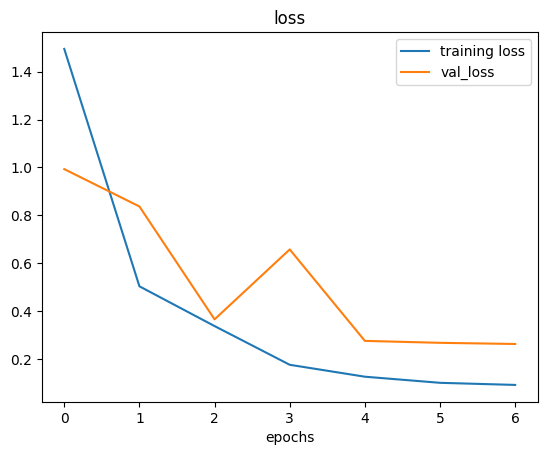

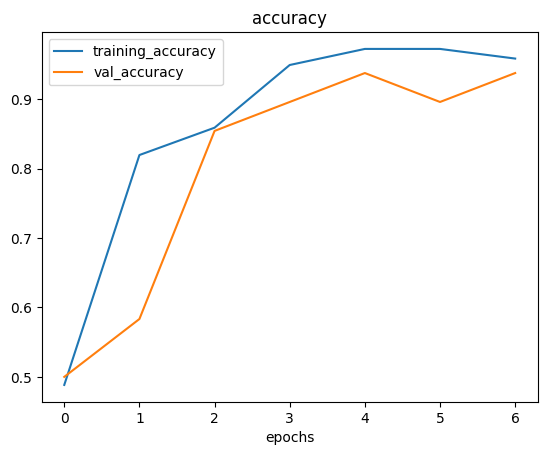

In [28]:
plot_loss_curves(history)

In [29]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [33]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Add logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


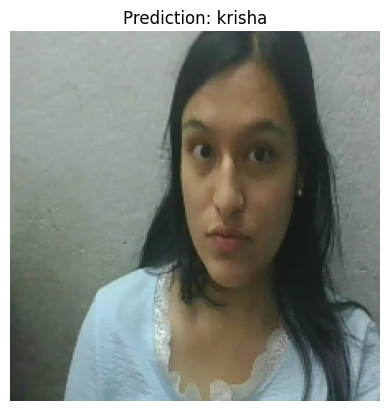

In [34]:
pred_and_plot(model,r"D:\FVRS\Face-Recognition-Attendance-System\model\new_data\test\krisha\krisha_164.jpg",class_names=class_names)

In [41]:
model.save('final_model/face_recognition_model.h5')